/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


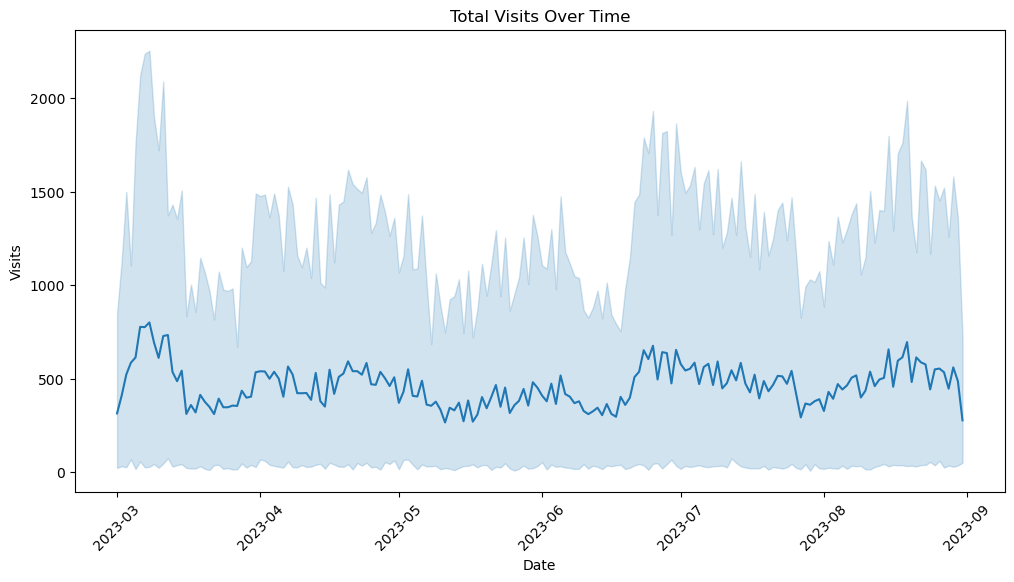

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


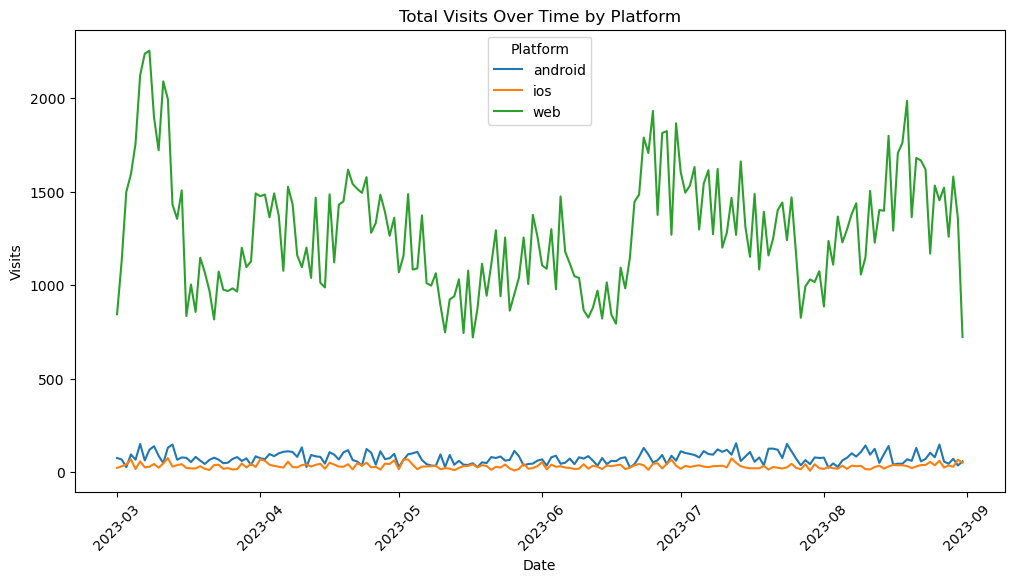

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


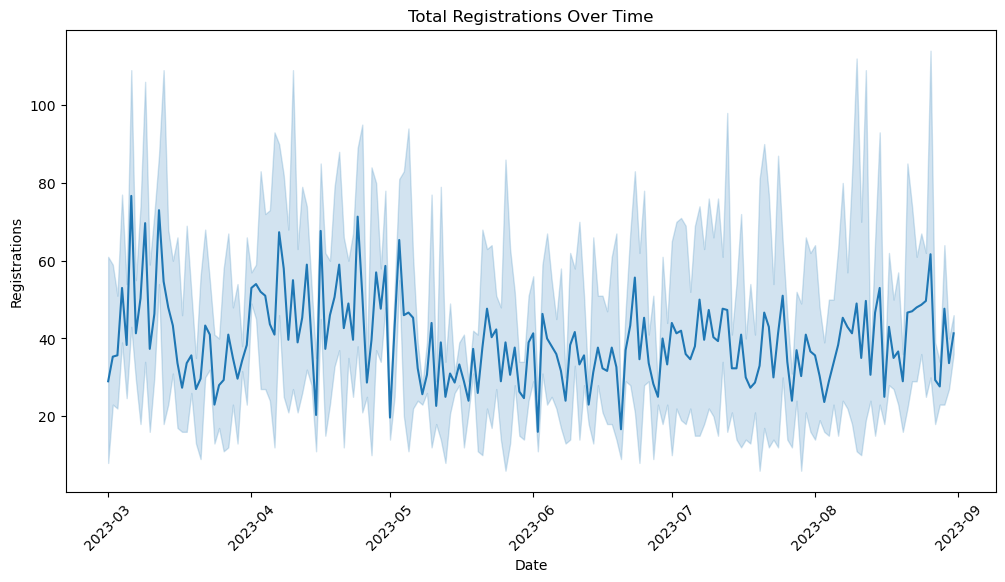

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


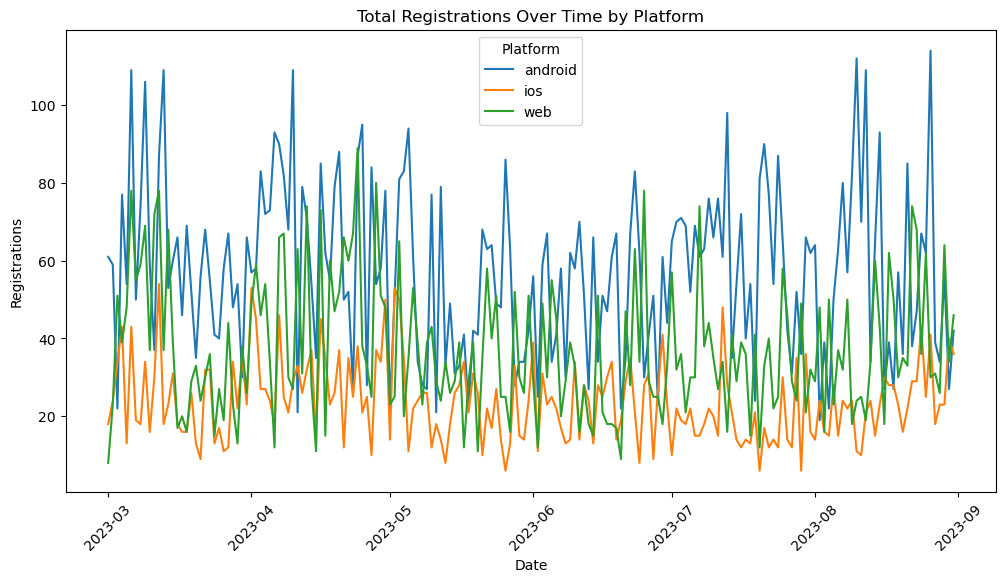

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


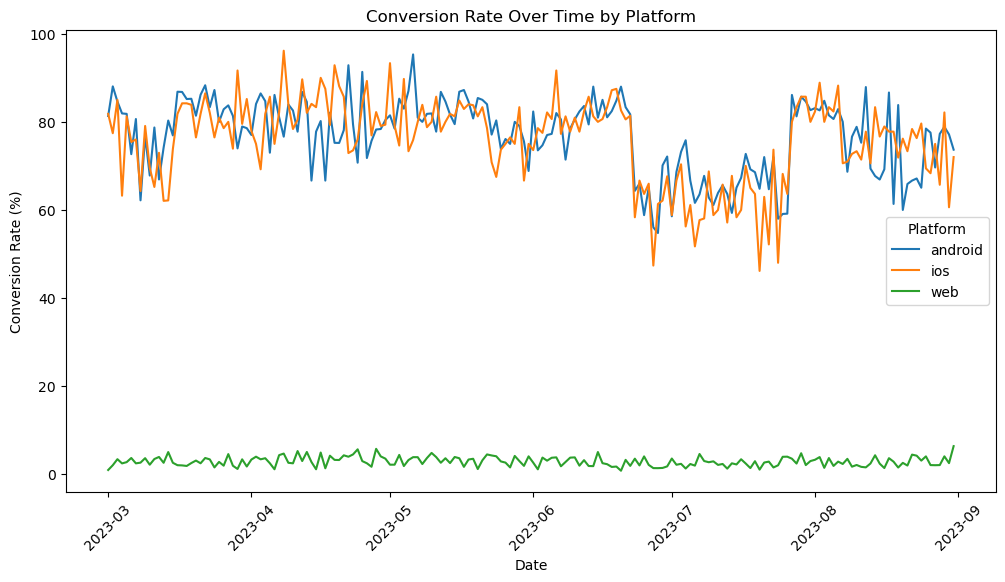

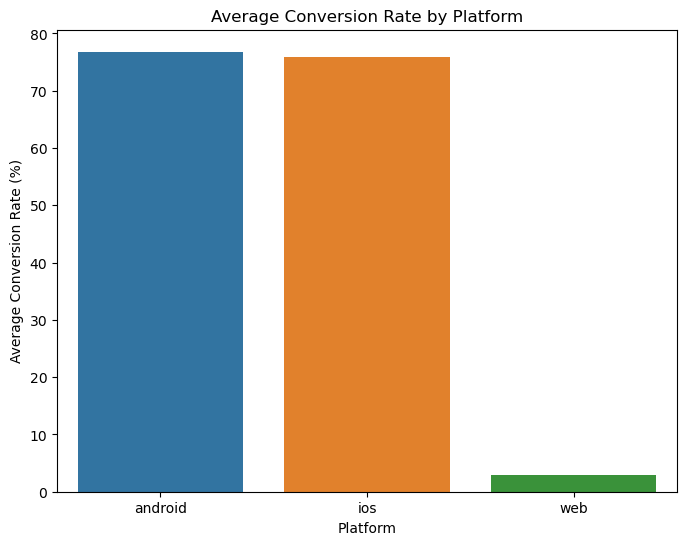

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


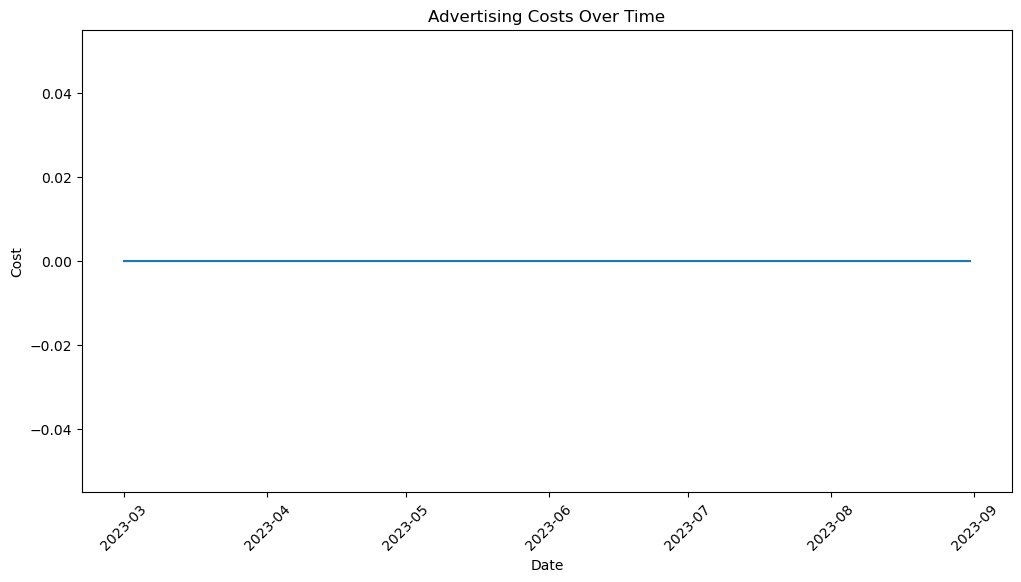

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


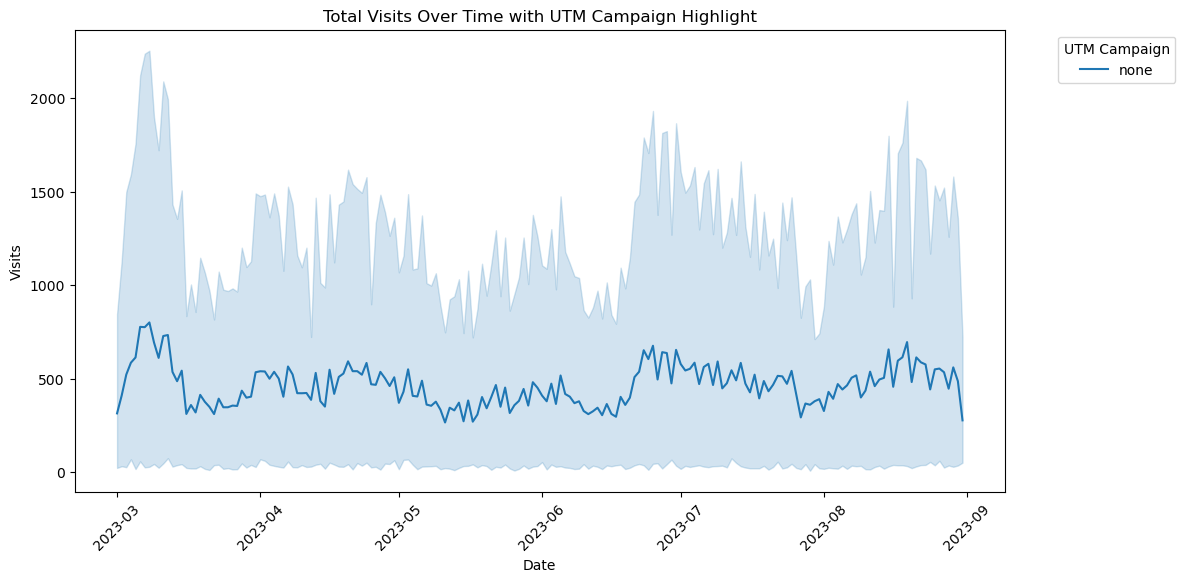

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


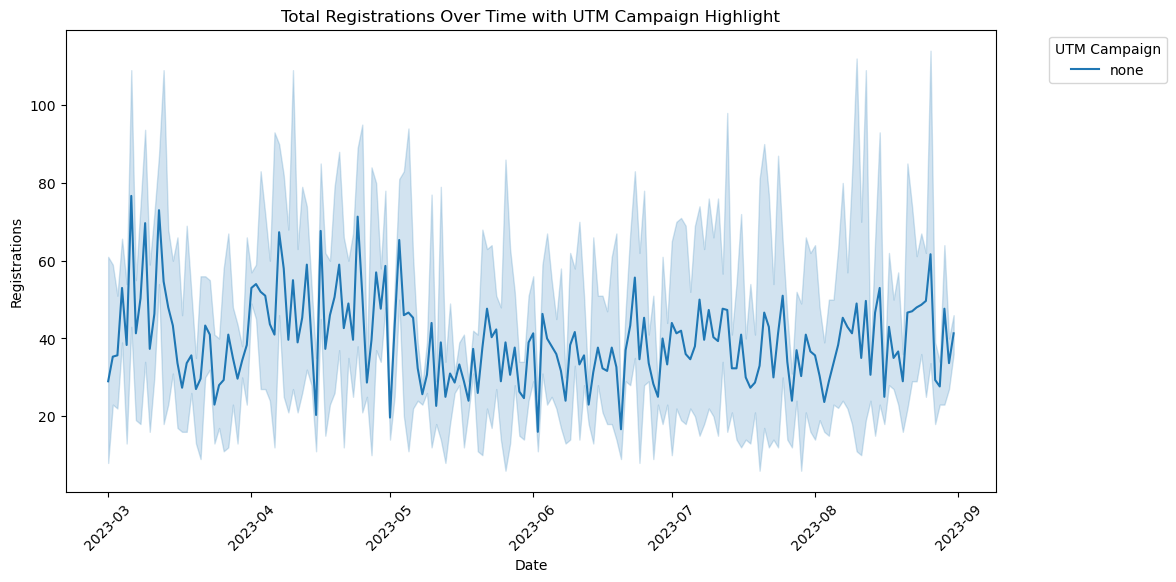

In [3]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Функция для загрузки и подготовки данных
def prepare_data():
    # Загрузка данных из файлов (предполагаем, что файлы уже сохранены)
    conversion_df = pd.read_json('conversion.json')
    ads_df = pd.read_csv('ads.csv')
    
    # Преобразование столбцов 'date' и 'date_group' в формат datetime
    ads_df['date'] = pd.to_datetime(ads_df['date'])
    conversion_df['date_group'] = pd.to_datetime(conversion_df['date_group'])
    
    # Группировка данных по 'date' и объединение с 'conversion_df'
    ads_grouped = ads_df.groupby('date').agg({'cost': 'sum', 'utm_campaign': 'first'}).reset_index()
    final_df = pd.merge(conversion_df, ads_grouped, left_on='date_group', right_on='date', how='left')
    
    # Заполнение NaN значений в столбцах 'cost' и 'utm_campaign'
    final_df['cost'] = final_df['cost'].fillna(0)
    final_df['utm_campaign'] = final_df['utm_campaign'].fillna('none')
    
    return final_df

# Создание директории для сохранения графиков
os.makedirs('./charts', exist_ok=True)

# Подготовка данных
final_df = prepare_data()

# Построение графиков

# Итоговые визиты
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='visits')
plt.title('Total Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.savefig('./charts/total_visits.png')
plt.show()

# Итоговые визиты с разбивкой по платформам
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='visits', hue='platform')
plt.title('Total Visits Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.savefig('./charts/total_visits_by_platform.png')
plt.show()

# Итоговые регистрации
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='registrations')
plt.title('Total Registrations Over Time')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.savefig('./charts/total_registrations.png')
plt.show()

# Итоговые регистрации с разбивкой по платформам
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='registrations', hue='platform')
plt.title('Total Registrations Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.savefig('./charts/total_registrations_by_platform.png')
plt.show()

# Конверсия по каждой платформе
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='conversion', hue='platform')
plt.title('Conversion Rate Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.savefig('./charts/conversion_rate_by_platform.png')
plt.show()

# Средняя конверсия
average_conversion = final_df.groupby('platform')['conversion'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_conversion, x='platform', y='conversion')
plt.title('Average Conversion Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Conversion Rate (%)')
plt.savefig('./charts/average_conversion_rate.png')
plt.show()

# Стоимости реклам
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='cost')
plt.title('Advertising Costs Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.savefig('./charts/advertising_costs.png')
plt.show()

# Визиты за весь период с цветовым выделением рекламной кампании
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='visits', hue='utm_campaign')
plt.title('Total Visits Over Time with UTM Campaign Highlight')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.xticks(rotation=45)
plt.legend(title='UTM Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./charts/total_visits_with_utm.png')
plt.show()

# Регистрации за весь период с цветовым выделением рекламной кампании
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='date_group', y='registrations', hue='utm_campaign')
plt.title('Total Registrations Over Time with UTM Campaign Highlight')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.legend(title='UTM Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./charts/total_registrations_with_utm.png')
plt.show()
